# ACTIVIDAD - BLOCH

In [162]:
%run complejos.py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math
import complejos as co
import cmath as cm
%matplotlib notebook

## Ejercicio 1

In [163]:

def grados_a_radianes(grados):
    return (grados*math.pi)/180

def convertir_punto(latitud):
    return -1 * latitud + 90

<IPython.core.display.Javascript object>


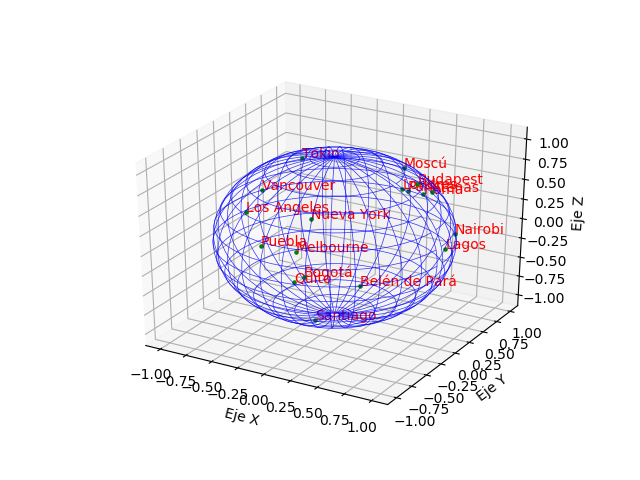

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

phi, theta = np.mgrid[0 : 2 * np.pi : 0.1, 0 : np.pi : 0.1]  # Equivale a hacer un doble for

# Para pasar de coordenadas esféricas (phi, theta) a coordenadas cartesianas (x, y, z):

x = np.cos(phi) * np.sin(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(theta)

# Para graficar la esfera (estructura de alambre):
ax.plot_wireframe(x, y, z, color='blue', rstride=2, cstride=2, linewidth=0.5, alpha=0.8)
Ciudades = [
    ['Londres', 51.5, -0.1167],
    ['Bogotá', 4.5964, -74.0833],
    ['Roma', 41.8960, 12.4833],
    ['Melbourne', -37.8200, 144.9750],
    ['Nairobi', -1.2833, 36.8167],
    ['Santiago', -33.4500, -70.6670],
    ['Nueva York', 40.6943, -73.9249],
    ['Los Angeles', 34.1139, -118.4068],
    ['Moscú', 55.7522, 37.6155],
    ['Quito', -0.2150, -78.5001],
    ['Tokio', 35.6850, 139.7514],
    ['Lagos', 6.4433, 3.3915],
    ['Atenas', 37.9833, 23.7333],
    ['Belén de Pará', -1.4500, -48.4800],
    ['Budapest', 47.5000, 19.0833],
    ['Vancouver', 49.2734, -123.1216],
    ['París', 48.8667, 2.3333],
    ['Puebla', 19.0500, -98.2000]
]

for ciudad in Ciudades:
    x1 = np.cos(grados_a_radianes(ciudad[2])) * np.sin(grados_a_radianes(convertir_punto(ciudad[1])))
    y1 = np.sin(grados_a_radianes(ciudad[2])) * np.sin(grados_a_radianes(convertir_punto(ciudad[1])))
    z1 = np.cos(grados_a_radianes(convertir_punto(ciudad[1])))
    ax.scatter(x1, y1, z1, color='green', s=5)
    ax.text(x1, y1, z1, ciudad[0], color='red')

# Nombres de los ejes
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')

plt.show()

## Ejercicio 2

In [165]:
kets = [['|0>', [(1, 0), (0, 0)]], 
        ['|1>', [(0, 0), (1, 0)]], 
        ['|in>', [(1/(2)**0.5, 0),(0, 1/(2)**0.5) ]], 
        ['|out>',[(0, 1/(2)**0.5), (1/(2)**0.5, 0)]], 
        ['|+>', [(1/(2)**0.5, 0), (1/(2)**0.5, 0)]], 
        ['|->', [(1/(2)**0.5, 0), (-1/(2)**0.5, 0)]]]

In [166]:
def ket_a_bloch(ket):
    modulo = co.modulo_vector(ket)
    ket_normalizado = co.vector_x_escalar(ket, modulo)
    c0, c1 = ket_normalizado[0], ket_normalizado[1]
    phi0 = cm.phase(complex(c0[0], c0[1]))
    phi1 = cm.phase(complex(c1[0], c1[1]))
    phi = phi1 - phi0
    theta = math.acos(cm.polar(complex(c0[0], c0[1]))[0])
    return phi, theta*2

In [167]:
def parametros_bloch(theta, phi):
    x = math.cos(phi) * math.sin(theta )
    y = math.sin(phi) * math.sin(theta )
    z = math.cos(theta )
    return x, y, z

In [168]:
def graficar_kets(kets, ax):
    colores =['blue','green','MAGENTA','CYAN','orange','indigo']
    i = 0
    for ket in kets:
        phi, theta = ket_a_bloch(ket[1])
        x2, y2, z2 = parametros_bloch(theta, phi)
        ax.scatter(x2, y2, z2, color='red', s=10) 
        ax.text(x2, y2, z2, ket[0], color='black')
        ax.quiver(0, 0, 0, x2, y2, z2, color=colores[i])
        i+= 1
    ax.scatter(0, 0, 0, color='red', s=25)
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')

<IPython.core.display.Javascript object>


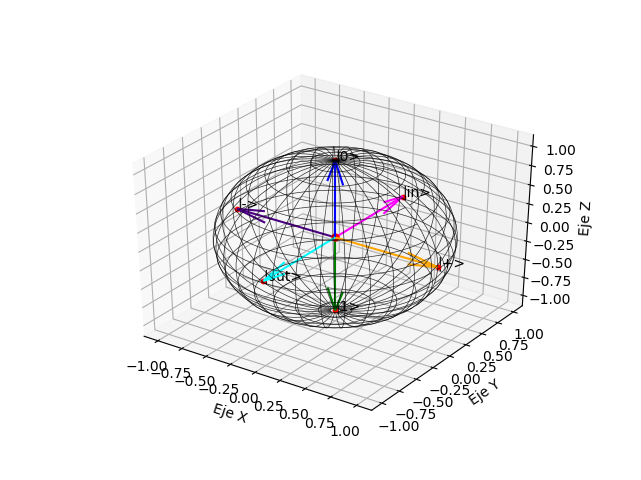

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
phi, theta = np.mgrid[0 : 2 * np.pi : 0.1, 0 : np.pi : 0.1]  # Equivale a hacer un doble for
ax.plot_wireframe(x, y, z, color='black', rstride=2, cstride=2, linewidth=0.5, alpha=0.8)
graficar_kets(kets, ax)

## Ejercicio 3

In [184]:
##Compuertas Logicas
X = [[(0, 0), (1, 0)],
     [(1,0), (0, 0)]]

I = [[(1, 0), (0, 0)], 
     [(0, 0), (1, 0)]]

H = [[(1/2**0.5, 0), (1/2**0.5, 0)], 
     [(1/2**0.5, 0), (-1/2**0.5, 0)]]

Y = [[(0, 0), (0, -1)], 
     [(0, 1), (0, 0)]]

Z = [[(1, 0), (0, 0)], 
     [(0, 0), (-1, 0)]]

S = [[(1, 0), (0, 0)], 
     [(0, 0), (0, 1)]]

c = cm.rect(1, math.pi/4)
r, i = c.real, c.imag
T = [[(1, 0), (0, 0)], 
     [(0, 0), (r, i)]]

def R(theta):
    return [[(1, 0), (0, 0)], 
            [(0, 0), (math.e**theta, 0)]]

def Rx(theta):
    return [[(math.cos(theta/2), 0), (0, -math.sin(theta/2))], 
            [(0, -math.sin(theta/2)), (math.cos(theta/2), 0)]]

def Ry(theta):
    return [[(math.cos(theta/2), 0), (-math.cos(theta/2), 0)], 
            [(math.sin(theta/2), 0), (math.cos(theta/2), 0)]]

def Rz(theta):
    c = cm.rect(1, -theta/2)
    a, b = c.real, c.imag
    
    d = cm.rect(1, theta/2)
    e, f = c.real, c.imag
    return [[(a, b), (0, 0)], 
            [(0, 0), (e, f)]]

def Rd(theta, D):
    Dx, Dy, Dz = D[0], D[1], D[1]
    a, b = math.cos(theta/2), math.sin(theta/2)
    return [[(a+Dy+Dz, 0), (Dx+Dy, b)], 
            [(Dx+Dy, b), (a-Dz, 0)]]
    

In [171]:
def transformar(kets, compuerta):
    aux = [[] for i in range(len(kets))]
    i = 0
    for ket in kets:
        aux[i].append(ket[0])
        aux[i].append(co.accion_matriz_vector(compuerta, ket[1]))
        i+=1
    return aux

<IPython.core.display.Javascript object>


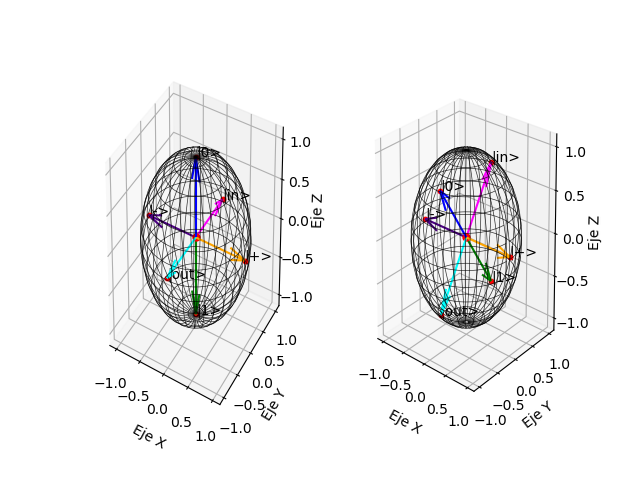

In [181]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
phi, theta = np.mgrid[0 : 2 * np.pi : 0.1, 0 : np.pi : 0.1]
ax.plot_wireframe(x, y, z, color='black', rstride=2, cstride=2, linewidth=0.5, alpha=0.8)


ax1 = fig.add_subplot(122, projection='3d')
phi1, theta1 = np.mgrid[0 : 2 * np.pi : 0.1, 0 : np.pi : 0.1]
ax1.plot_wireframe(x, y, z, color='black', rstride=2, cstride=2, linewidth=0.5, alpha=0.8)

graficar_kets(kets, ax)

#Para realizar la transformacion deseada solo de debe cambiar el segundo parametro de la funcion transformar
tkets = transformar(kets, Rx(math.pi/4))
graficar_kets(tkets, ax1)

